<a href="https://colab.research.google.com/github/CesarAF10/Simulaci-n-I/blob/main/Flecha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

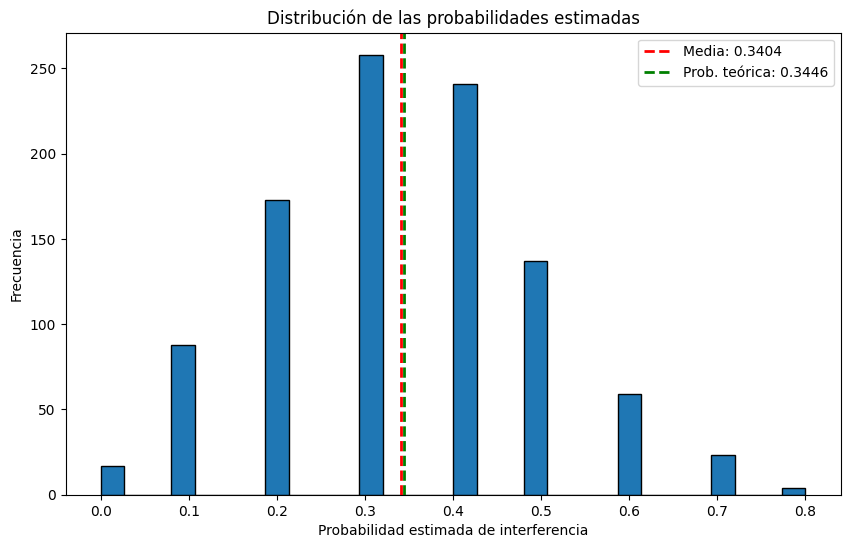

Probabilidad de interferencia:
  - Probabilidad media estimada: 0.3404
  - Probabilidad teórica: 0.3446
Número de experimentos necesarios: 8677


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# INCISO A)

def experimento(n=10):
    exitos = 0 # Contador de casos donde x2 >= x1 (interferencia)
    for _ in range(n):
        x1 = np.random.normal(1.5, 0.04)  # Genera un valor aleatorio para x1 (normal con media 1.5 y desviación 0.04)
        x2 = np.random.normal(1.48, 0.03) # Genera un valor aleatorio para x2 (normal con media 1.48 y desviación 0.03)
        if x2 >= x1:
            exitos += 1  # Condición de interferencia
    return exitos / n

def muestra(m=1000, n_experimento=10):  # Función que repite el experimento 'm' veces para obtener una muestra de probabilidades
    lista = []  # Para almacenar los resultados de cada experimento
    for _ in range(m):
        e = experimento(n_experimento)   # Realiza un experimento con n_experimento pares
        lista.append(e)
    return lista


# INCISO B)

mu1, sigma1 = 1.5, 0.04
mu2, sigma2 = 1.48, 0.03
mu_diff = mu2 - mu1
sigma_diff = np.sqrt(sigma1**2 + sigma2**2)


prob_teorica = 1 - norm.cdf(0, loc=mu_diff, scale=sigma_diff)

Z = 1.96 # Valor z para 95% de confianza
E = 0.01 # Error máximo permitido
p = prob_teorica
n_necesario = (Z**2 * p * (1-p)) / E**2


m = 1000  # Ejecuta la simulación principal: 1000 experimentos, cada uno con 10 pares (x1,x2)
resultados = muestra(m) # Obtiene los 1000 resultados

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.hist(resultados, bins=30, edgecolor='black')
plt.axvline(np.mean(resultados), color='red', linestyle='dashed', linewidth=2, label=f'Media: {np.mean(resultados):.4f}')
plt.axvline(prob_teorica, color='green', linestyle='dashed', linewidth=2, label=f'Prob. teórica: {prob_teorica:.4f}')
plt.xlabel('Probabilidad estimada de interferencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de las probabilidades estimadas')
plt.legend()
plt.show()
print("Probabilidad de interferencia:")
print(f"  - Probabilidad media estimada: {np.mean(resultados):.4f}")
print(f"  - Probabilidad teórica: {prob_teorica:.4f}")
print(f"Número de experimentos necesarios: {int(np.ceil(n_necesario))}")